In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import numpy as np

(17, 17)


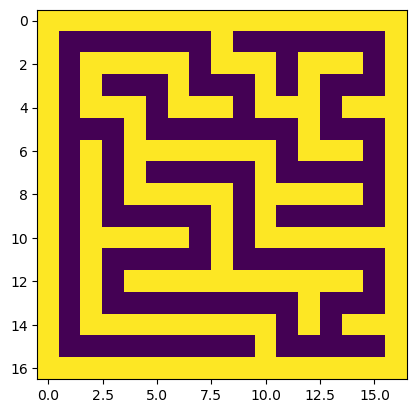

In [3]:
#Denhär koden genererar en random maze med width och height av 16 där 1 representerar väggar och 0 representerar paths.
def make_maze(w, h):
    #visited
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    #vertical
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    #horizontal
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
#Här genereras en random path. 
    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
#Om en node redan har besökts så hoppar loopen över den och går vidare till nästa node.
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
# 's' sparar 'hor' & 'ver' variablerna som sedan används av M.
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
#'M' använder variablerna från 's' och skapar en lista som i sin tur blir själva mazen. 
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)

print(maze.shape)

In [4]:
print(maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1]
 [1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


[0.22 0.26 0.26 0.26]
4947.0 4947


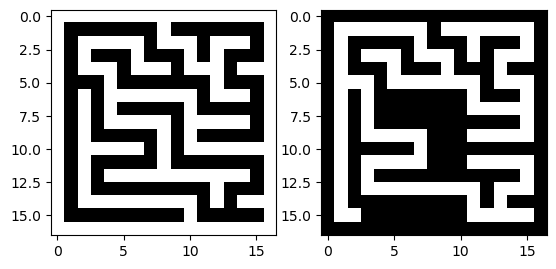

In [5]:
# initiera visited array och policy array
visited=numpy.zeros((17,17))
policy=numpy.array([0.22,0.26,0.26,0.26])
# Printa policy arrayen
print(policy)
# Starta random walk på position (1,1)
x=1
y=1
# Definera x och y offsets för att röra sig i de 4 random hållen.
xm=[0,1,0,-1]
ym=[1,0,-1,0]
# Initiera för att hålla koll på walkers path
trackX=[x]
trackY=[y]
# markera startpositionen som visited
visited[x][y]=1

# loopen ser till att randomwalk fortsätts tills att man nått högra hörneet
# alltså slutpositionen 
while x!=15 or y!=15:
    # väljer en riktning att gå åt baserat utifrån sannolikheterna från policyn
    direction=numpy.random.choice([0,1,2,3],p=policy)
    tx=x+xm[direction]
    ty=y+ym[direction]
    # kollar så att det är en valid position i mazen
    if maze[tx][ty]==0:
        x=tx
        y=ty
        # markerar den nya positionen som visited
        visited[x][y]+=1
        trackX.append(x)
        trackY.append(y)

subplot(1,2,1)
imshow(maze,cmap='gray')
subplot(1,2,2)
imshow(visited,cmap='gray',vmax=1)
print(visited.sum(),len(trackX))

In [6]:
# initierar policy arrayen
policy=numpy.ones((17,17,4))/4.0
print(policy.shape)
# uppdaterar policy värdena
print(policy[1][1])
print(policy[1][3])
policy[1][1]=numpy.array([0.0,0.0,1.0,0.0])
policy[1][3]=numpy.array([0.0,1.0,0.0,0.0])
#printar ut de uppdaterade policy värderna
print(policy[1][1])
print(policy[1][3])

(17, 17, 4)
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0. 0. 1. 0.]
[0. 1. 0. 0.]


6255.0 6255


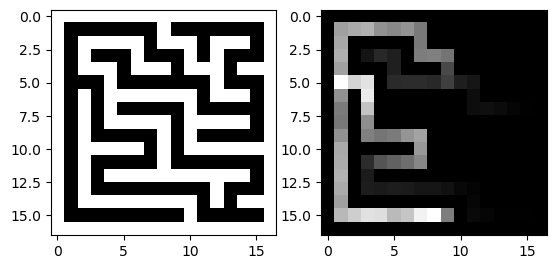

In [7]:
visited=numpy.zeros((17,17)) #skapar en array med 0:or för att kunna spara visited steps.
policy=numpy.ones((17,17,4))/4.0 #skapar en 3d array där alla element är satta till 1/4. (25%)
learningRate=0.01 #learning rate som används för att uppdatera policyn
#startpostition (1,1)
x=1
y=1
#vilka håll x och y kan gå
xm=[0,1,0,-1]
ym=[1,0,-1,0]
# skspar listor för att 'keep track' of steps and actions
trackX=[x]
trackY=[y]
actions=[]
visited[x][y]=1 #skapar lista som ska hålla koll på visited cells, och börjar med att göra startpositionen till visited (1).
while x!=15 or y!=15: #breakar loopen när målet är nått.
    direction=numpy.random.choice([0,1,2,3],p=policy[x][y]) #baserat på policyn av nuvarande cell slumpas nästa steg. 
    #uppdatera x och y positionerna
    tx=x+xm[direction] 
    ty=y+ym[direction]
    
    #kollar så det är en valid position i mazen, alltså inte en vägg. Om potitionen är valid så händer följande
    if maze[tx][ty]==0: 
        x=tx 
        y=ty
        visited[x][y]+=1 #markerar cellen som visited
        #lägger till x och y positioner samt actions i respektive listor.
        trackX.append(x) 
        trackY.append(y) 
        actions.append(direction)
        
for i in range(len(actions)):
    policy[trackX[i]][trackY[i]][actions[i]]+=learningRate #learningrate läggs till och ökar cellens policy och vilka actions som görs
for i in range(17):
    for j in range(17):
        policy[i][j]/=policy[i][j].sum() #normaliserar policyn efter uppdatering
        
subplot(1,2,1)
imshow(maze,cmap='gray') #visualiserar mazen
subplot(1,2,2)
imshow(visited,cmap='gray') #visualiserar visited cells
print(visited.sum(),len(trackX)) #printar hur många steg och längden på vägen den tagit.

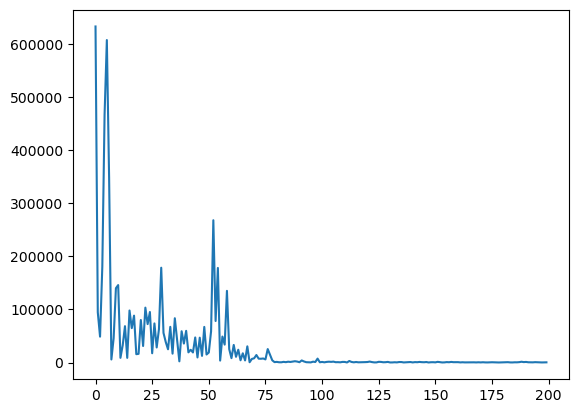

In [8]:
policy=numpy.ones((17,17,4))/4.0 #skapar där alla element är satta till 1/4.
policy=numpy.random.random((17,17,4)) #skapar en 3d array med random values
for i in range(17):
    for j in range(17):
        policy[i][j]/=policy[i][j].sum() #normaliserar policy arrayn

learningRate=0.01 #learning rate som används för att uppdatera policyn

L=[] #skapar en lista för att hålla koll på längden på pathen
for i in range(200): #loopar 200 gånger
    visited=numpy.zeros((17,17)) #initialiserar visited array med alla element som 0.
    #startpostition (1,1)
    x=1
    y=1
    #vilka håll x och y kan gå
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    # skspar listor för att 'keep track' of steps and actions
    trackX=[x]
    trackY=[y]
    actions=[]
    visited[x][y]=1 #skapar lista som ska hålla koll på visited cells, och börjar med att göra startpositionen till visited (1).
    while x!=15 or y!=15: #breakar loopen när målet är nått.
        direction=numpy.random.choice([0,1,2,3],p=policy[x][y]) #baserat på policyn av nuvarande cell slumpas nästa steg.
        #uppdatera x och y positionerna
        tx=x+xm[direction]
        ty=y+ym[direction]
        
        #kollar så det är en valid position i mazen, alltså inte en vägg. Om potitionen är valid så händer följande
        if maze[tx][ty]==0:
            x=tx
            y=ty
            visited[x][y]+=1 #markerar cellen som visited
            #lägger till x och y positioner samt actions i respektive listor.
            trackX.append(x)
            trackY.append(y)
            actions.append(direction)

    for i in range(len(actions)):
        policy[trackX[i]][trackY[i]][actions[i]]+=learningRate #learningrate läggs till och ökar cellens policy och vilka actions som görs
    for i in range(17):
        for j in range(17):
            policy[i][j]/=policy[i][j].sum() #normaliserar policyn efter uppdatering
    L.append(len(actions))
    
plot(L) #plottar längden av pathen över alla försök. Här kan vi se tydlig förbättring!

442


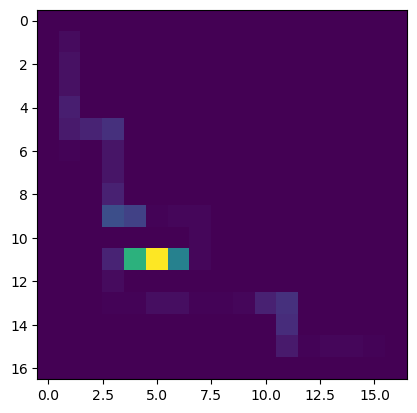

In [13]:
imshow(visited) #Visualiserar mest/minst visited cells.
print(len(actions)) #printar antalet steg från det sista försöket